IMPORT DATASETS AND LIBRARIES


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras


In [ ]:
# Read stock prices data
stock_price_df = pd.read_csv('/content/drive/MyDrive/PROJECT CODE/Part 3. AI and ML in Finance/stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Read the stocks volume data
stock_vol_df = pd.read_csv("/content/drive/MyDrive/PROJECT CODE/Part 3. AI and ML in Finance/stock_volume.csv")
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [ ]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Sort the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [ ]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

 PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

In [ ]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [ ]:
# Function to return the input/output (target) data for AI/ML Model
# Target stock price today will be tomorrow's price
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [ ]:

price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'TSLA')
price_volume_df

,Date,Close,Volume
0,2012-01-12,28.250000,729300
1,2012-01-13,22.790001,5500400
2,2012-01-17,26.600000,4651600
3,2012-01-18,26.809999,1260200
4,2012-01-19,26.760000,1246300
...,...,...,...
2154,2020-08-05,1485.020020,4978000
2155,2020-08-06,1489.579956,5992300
2156,2020-08-07,1452.709961,8883500
2157,2020-08-10,1418.569946,7522300


In [ ]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,28.250000,729300,22.790001
1,2012-01-13,22.790001,5500400,26.600000
2,2012-01-17,26.600000,4651600,26.809999
3,2012-01-18,26.809999,1260200,26.760000
4,2012-01-19,26.760000,1246300,26.600000
...,...,...,...,...
2154,2020-08-05,1485.020020,4978000,1489.579956
2155,2020-08-06,1489.579956,5992300,1452.709961
2156,2020-08-07,1452.709961,8883500,1418.569946
2157,2020-08-10,1418.569946,7522300,1374.390015


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,28.250000,729300,22.790001
1,2012-01-13,22.790001,5500400,26.600000
2,2012-01-17,26.600000,4651600,26.809999
3,2012-01-18,26.809999,1260200,26.760000
4,2012-01-19,26.760000,1246300,26.600000
...,...,...,...,...
2153,2020-08-04,1487.000000,8415000,1485.020020
2154,2020-08-05,1485.020020,4978000,1489.579956
2155,2020-08-06,1489.579956,5992300,1452.709961
2156,2020-08-07,1452.709961,8883500,1418.569946


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.00336993, 0.00601579, 0.        ],
       [0.        , 0.08478074, 0.00235155],
       [0.00235155, 0.0707681 , 0.00248116],
       ...,
       [0.90530854, 0.0929014 , 0.88255224],
       [0.88255224, 0.14063153, 0.86148089],
       [0.86148089, 0.1181598 , 0.83421286]])

In [ ]:
price_volume_target_scaled_df.shape

(2158, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158, 1))

In [ ]:
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [ ]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

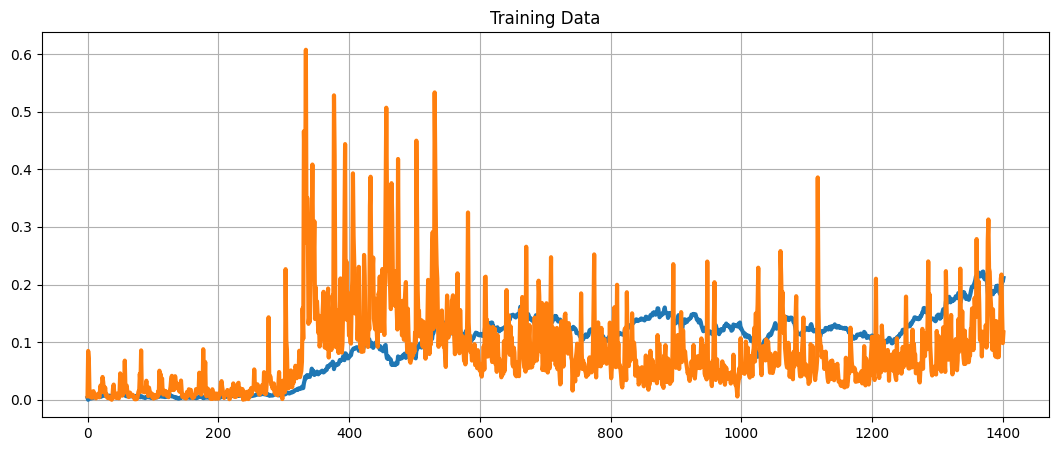

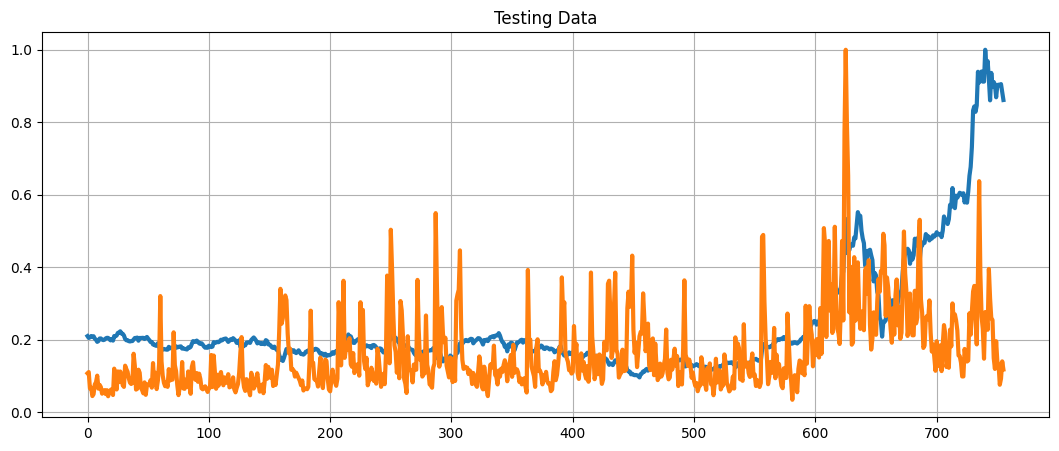

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth=3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9319440964652443


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.01835647],
       [0.01869937],
       [0.02004816],
       ...,
       [0.74748618],
       [0.73102595],
       [0.71319906]])

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

2158

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.003370
1,2012-01-13,0.000000
2,2012-01-17,0.002352
3,2012-01-18,0.002481
4,2012-01-19,0.002450
...,...,...
2153,2020-08-04,0.903716
2154,2020-08-05,0.902494
2155,2020-08-06,0.905309
2156,2020-08-07,0.882552


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.003370,0.018356
1,2012-01-13,0.000000,0.018699
2,2012-01-17,0.002352,0.020048
3,2012-01-18,0.002481,0.017981
4,2012-01-19,0.002450,0.017947
...,...,...,...
2153,2020-08-04,0.903716,0.747756
2154,2020-08-05,0.902494,0.744572
2155,2020-08-06,0.905309,0.747486
2156,2020-08-07,0.882552,0.731026


In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

 TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'TSLA')
price_volume_df

,Date,Close,Volume
0,2012-01-12,28.250000,729300
1,2012-01-13,22.790001,5500400
2,2012-01-17,26.600000,4651600
3,2012-01-18,26.809999,1260200
4,2012-01-19,26.760000,1246300
...,...,...,...
2154,2020-08-05,1485.020020,4978000
2155,2020-08-06,1489.579956,5992300
2156,2020-08-07,1452.709961,8883500
2157,2020-08-10,1418.569946,7522300


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.82500000e+01, 7.29300000e+05],
       [2.27900010e+01, 5.50040000e+06],
       [2.66000000e+01, 4.65160000e+06],
       ...,
       [1.45270996e+03, 8.88350000e+06],
       [1.41856995e+03, 7.52230000e+06],
       [1.37439001e+03, 8.35600000e+06]])

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.00336993]),
 array([0.]),
 array([0.00235155]),
 array([0.00248116]),
 array([0.0024503]),
 array([0.00235155]),
 array([0.00245647]),
 array([0.00285765]),
 array([0.00319712]),
 array([0.0037958]),
 array([0.00403651]),
 array([0.00418464]),
 array([0.00387604]),
 array([0.00419081]),
 array([0.00460434]),
 array([0.00515982]),
 array([0.00556101]),
 array([0.00543757]),
 array([0.00564124]),
 array([0.00604243]),
 array([0.00512896]),
 array([0.00536967]),
 array([0.00640658]),
 array([0.00667197]),
 array([0.00702995]),
 array([0.00751754]),
 array([0.00722746]),
 array([0.00705464]),
 array([0.00724597]),
 array([0.00676455]),
 array([0.00668432]),
 array([0.00680159]),
 array([0.00655471]),
 array([0.00717191]),
 array([0.00694354]),
 array([0.0067769]),
 array([0.00636954]),
 array([0.00637572]),
 array([0.00634486]),
 array([0.00737559]),
 array([0.00815943]),
 array([0.00820881]),
 array([0.00771505]),
 array([0.00753606]),
 array([0.00773356]),
 array([0.00752372]),

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_3 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 16s 184ms/step - loss: 0.0037 - val_loss: 0.0085
Epoch 2/20
38/38 [==============================] - 1s 29ms/step - loss: 0.0016 - val_loss: 4.3370e-04
Epoch 3/20
38/38 [==============================] - 1s 29ms/step - loss: 9.3896e-05 - val_loss: 2.7013e-05
Epoch 4/20
38/38 [==============================] - 1s 23ms/step - loss: 5.2334e-05 - val_loss: 1.7362e-05
Epoch 5/20
38/38 [==============================] - 1s 16ms/step - loss: 3.8546e-05 - val_loss: 1.9071e-05
Epoch 6/20
38/38 [==============================] - 1s 16ms/step - loss: 3.8363e-05 - val_loss: 1.7106e-05
Epoch 7/20
38/38 [==============================] - 1s 15ms/step - loss: 3.2960e-05 - val_loss: 2.0249e-05
Epoch 8/20
38/38 [==============================] - 1s 15ms/step - loss: 3.5732e-05 - val_loss: 1.7188e-05
Epoch 9/20
38/38 [==============================] - 1s 15ms/step - loss: 3.8898e-05 - val_loss: 3.8708e-05
Epoch 10/20
38/38 [============================

In [ ]:
# Make prediction
predicted = model.predict(X)

68/68 [==============================] - 2s 5ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.0048651723,
 0.0015744921,
 0.0038706558,
 0.0039972225,
 0.0039670886,
 0.0038706558,
 0.003973116,
 0.0043648947,
 0.004696398,
 0.0052810805,
 0.005516162,
 0.0056608263,
 0.005359439,
 0.0056668576,
 0.0060707284,
 0.0066132676,
 0.0070051113,
 0.006884544,
 0.007083485,
 0.007475343,
 0.006583128,
 0.006818231,
 0.00783103,
 0.008090276,
 0.008439954,
 0.008916257,
 0.008632889,
 0.008464072,
 0.008650972,
 0.008180713,
 0.008102335,
 0.008216884,
 0.007975725,
 0.008578628,
 0.008355549,
 0.008192767,
 0.007794866,
 0.007800891,
 0.0077707446,
 0.0087775905,
 0.009543308,
 0.00959155,
 0.0091092,
 0.008934346,
 0.009127283,
 0.008922287,
 0.008910226,
 0.009024788,
 0.008572597,
 0.008379669,
 0.010381436,
 0.010707051,
 0.010652784,
 0.010339227,
 0.01028496,
 0.009886998,
 0.010749261,
 0.008934346,
 0.0086208265,
 0.007818977,
 0.007402997,
 0.0077828066,
 0.007993809,
 0.008084249,
 0.007276397,
 0.0072703664,
 0.007523573,
 0.007825004,
 0.007825004,
 0.007089515,
 0.0070

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2012-01-13,0.004865
2,2012-01-17,0.001574
3,2012-01-18,0.003871
4,2012-01-19,0.003997
5,2012-01-20,0.003967
...,...,...
2154,2020-08-05,0.870273
2155,2020-08-06,0.869169
2156,2020-08-07,0.871712
2157,2020-08-10,0.851104


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])


In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2012-01-13,0.004865,0.000000
2,2012-01-17,0.001574,0.002352
3,2012-01-18,0.003871,0.002481
4,2012-01-19,0.003997,0.002450
5,2012-01-20,0.003967,0.002352
...,...,...,...
2154,2020-08-05,0.870273,0.902494
2155,2020-08-06,0.869169,0.905309
2156,2020-08-07,0.871712,0.882552
2157,2020-08-10,0.851104,0.861481


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs Prediction")